In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv(r"C:\Users\nk424\OneDrive\Scans\Desktop\training\Sample_Data\placement_new.csv")
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [3]:
df.shape

(200, 2)

In [4]:
df.duplicated().sum()


np.int64(0)

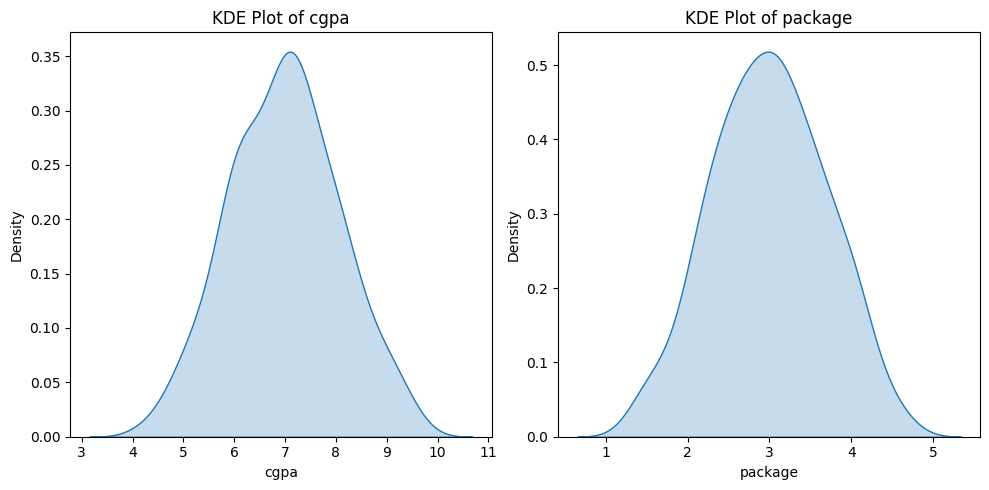

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))

for i, col in enumerate(df.select_dtypes(include='number').columns):
    plt.subplot(1, 2, i+1)
    sns.kdeplot(df[col], fill=True)
    plt.title(f"KDE Plot of {col}")

plt.tight_layout()
plt.show()


In [6]:
df.select_dtypes(include='object').columns

Index([], dtype='object')

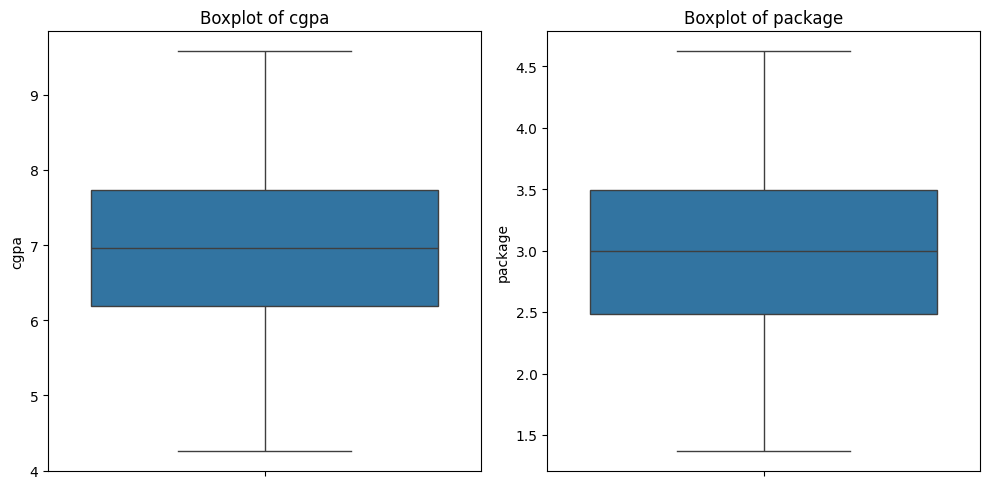

In [7]:
plt.figure(figsize=(10,5))

for i, col in enumerate(df.select_dtypes(include='number').columns):
    plt.subplot(1, 2, i+1)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


In [8]:
df.skew(numeric_only=True)

cgpa       0.029655
package   -0.004815
dtype: float64

In [9]:
for col in df.select_dtypes(include='number').columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"{col} Outliers: {len(outliers)}")


cgpa Outliers: 0
package Outliers: 0


In [10]:
#Apply Z-Score & Remove Outliers
from scipy import stats

# Calculate absolute Z-score
z = np.abs(stats.zscore(df))

# Keep rows where all values have Z < 3
df_clean = df[(z < 3).all(axis=1)]

print("Original Shape:", df.shape)
print("After Z-score Outlier Removal:", df_clean.shape)


Original Shape: (200, 2)
After Z-score Outlier Removal: (200, 2)


In [11]:
df_clean.select_dtypes(include='object').columns

Index([], dtype='object')

In [12]:
x=df.iloc[:,:-1].values
y=df.iloc[:,1].values

In [13]:
type(x)
type(y)

numpy.ndarray

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.25 , random_state = 0)

In [15]:
print("Shape of X_Train:" ,x_train.shape )
print("Shape of X_Test:" , x_test.shape)
print("Shape of Y_Train:" , y_train.shape)
print("Shape of Y_Test:" , y_test.shape)

Shape of X_Train: (150, 1)
Shape of X_Test: (50, 1)
Shape of Y_Train: (150,)
Shape of Y_Test: (50,)


In [16]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [17]:
x_pred=lr.predict(x_test)
y_pred=lr.predict(x_train)

<function matplotlib.pyplot.show(close=None, block=None)>

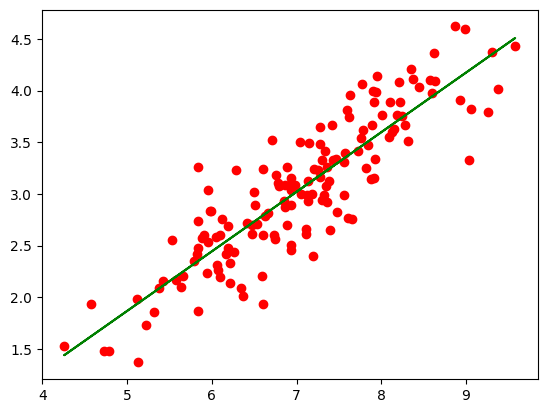

In [18]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,y_pred,color='g')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

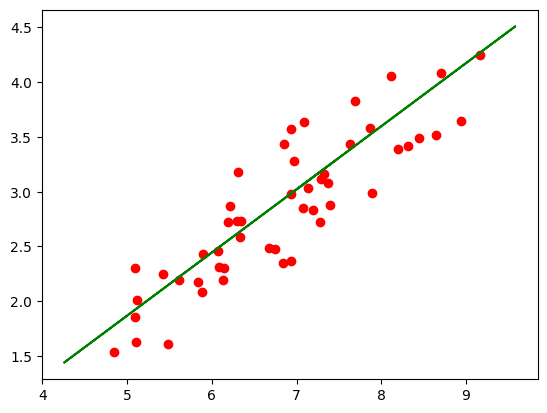

In [19]:
plt.scatter(x_test,y_test,color='red')
plt.plot(x_train,y_pred,color='g')
plt.show

In [20]:
lr.score(x_test,y_test)

0.755519255511147

In [21]:
m=lr.coef_
m

array([0.57660395])

In [22]:
b=lr.intercept_
b

np.float64(-1.015474541448532)

In [23]:
df.head()


,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [24]:
y1=m*6.89+b
y1

array([2.95732666])

In [25]:
y2=m*2.4+b
y2

array([0.36837494])

In [26]:
from sklearn.metrics import mean_squared_error , r2_score, mean_absolute_error

In [27]:
print("MSE VALUE:", mean_squared_error(y_test,x_pred))

MSE VALUE: 0.1064496641140147


In [28]:
print("MAE:",mean_absolute_error(y_test,x_pred))

MAE: 0.26818476036281685


In [29]:
print("RMSE:",np.sqrt(mean_squared_error(y_test,x_pred)))

RMSE: 0.32626624727975573


In [30]:
print("R2 SCORE:",r2_score(y_test,x_pred))

R2 SCORE: 0.755519255511147
